<a href="https://colab.research.google.com/github/ferdouszislam/Weather-WaterLevel-Prediction-ML/blob/main/Notebooks/brri-dataset/experimentations/regression/selected_algorithms/xgboost_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# # the imports in this cell are required when running on local device
# import os, sys
# sys.path.append(os.path.join('..', '..'))
# from utils.applyML_util import train_regression, eval_regression
# from utils.featureSelection_util import (pearson_correlation_fs, 
#                                          seleckKBest_fs, selectSequential_fs)

In [2]:
# the imports in this cell are required when running from Cloud (Colab/Kaggle)
# before running on cloud you nee to upload the .py files 
# from 'Notebooks/utils' directory
from applyML_util import train_regression, eval_regression, showEvalutationGraph_regression
from featureSelection_util import (pearson_correlation_fs, 
                                   seleckKBest_fs, selectSequential_fs)

**XGBoost documentation link:** https://xgboost.readthedocs.io/en/latest/python/python_api.html#xgboost.XGBRegressor  
**Hyper-parameters:** https://kevinvecmanis.io/machine%20learning/hyperparameter%20tuning/dataviz/python/2019/05/11/XGBoost-Tuning-Visual-Guide.html


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from xgboost.sklearn import XGBRegressor

In [4]:
# global random seed
RAND_SEED = 42

# initial model with only random seed and not any hyper-parametes
initial_model = XGBRegressor(random_state=RAND_SEED, n_jobs=-1, objective ='reg:squarederror')

# hyper-parameters
n_estimators = list(range(100, 360, 5))
tree_method = ['hist']
learning_rate = [0.001, 0.01, 0.1, 1.0]
subsample = [0.25, 0.5, 1.0]

# dictonary of all hyperparameters
param_grid = {
    'n_estimators': n_estimators,
    'tree_method': tree_method,
    'learning_rate': learning_rate,
    'subsample': subsample,
}

## 1. Experimentation on the Weather Daily dataset

In [5]:
# Load the train dataset
weather_daily_train_df = pd.read_csv('https://raw.githubusercontent.com/ferdouszislam/Weather-WaterLevel-Prediction-ML/main/Datasets/brri-datasets/final-dataset/train/brri-weather_train_regression.csv')

# Load the test set
weather_daily_test_df = pd.read_csv('https://raw.githubusercontent.com/ferdouszislam/Weather-WaterLevel-Prediction-ML/main/Datasets/brri-datasets/final-dataset/test/brri-weather_test_regression.csv')

In [6]:
# train model
model, selected_hyperparams, train_r2, train_mae, train_rmse = train_regression(initial_model, param_grid, weather_daily_train_df, cls='Rainfall (mm)')
print(f'Selected hyperparameters: {selected_hyperparams}')
# performance on the train set
print(f'Train set performance: r2-score={train_r2}, mae={train_mae}, rmse={train_rmse}')

Selected hyperparameters: {'learning_rate': 0.01, 'n_estimators': 345, 'subsample': 0.25, 'tree_method': 'hist'}
Train set performance: r2-score=0.2613, mae=6.159, rmse=12.8415


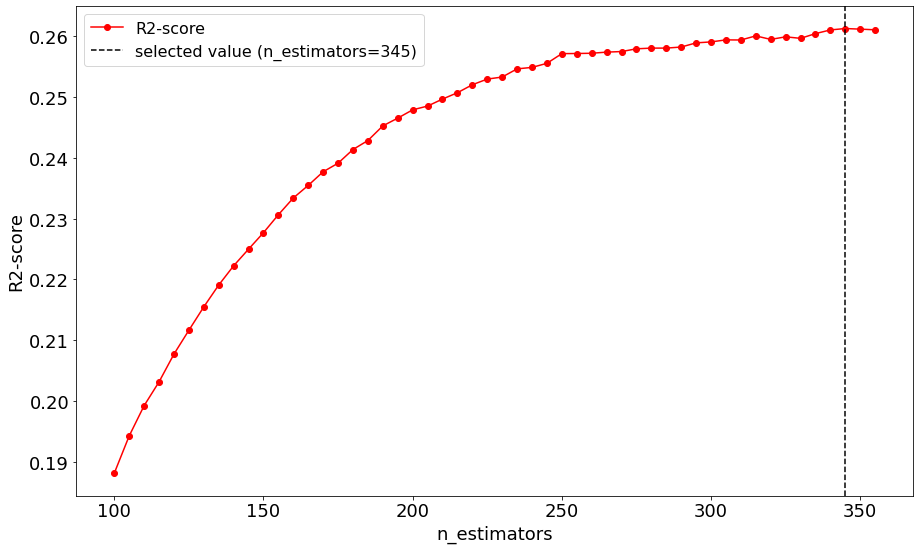

In [7]:
# r2-scores graph on the train set

# hyper-parameters selected by GridSearchCV
selected_model_params = selected_hyperparams
selected_model_params['random_state'] = RAND_SEED
selected_model_params['n_jobs'] = -1
selected_model_params['objective'] = 'reg:squarederror'

showEvalutationGraph_regression(XGBRegressor, weather_daily_train_df, cls='Rainfall (mm)', 
                                x_axis_param_name='n_estimators', x_axis_param_vals=n_estimators, 
                                selected_model_params=selected_model_params)

In [8]:
# test model
test_r2, test_mae, test_rmse = eval_regression(model, weather_daily_test_df, cls='Rainfall (mm)')
# performance on the test set
print(f'Test set performance: r2-score={test_r2}, mae={test_mae}, rmse={test_rmse}')

Test set performance: r2-score=0.1622, mae=6.5679, rmse=15.8264


### 1.1 Apply Pearson Feature Selection to Daily Weather Dataset

In [9]:
# select features from the train dataset
weather_daily_fs_train_df, cols_to_drop = pearson_correlation_fs(weather_daily_train_df, 'Rainfall (mm)')

# keep only selected features on the test dataset
weather_daily_fs_test_df = weather_daily_test_df.drop(columns=cols_to_drop)

dropping Sunshine (hour/day) from (Cloudy (hour/day), Sunshine (hour/day))


In [10]:
# train model
model, selected_hyperparams, train_r2, train_mae, train_rmse = train_regression(initial_model, param_grid, weather_daily_fs_train_df, cls='Rainfall (mm)')
print(f'Selected hyperparameters: {selected_hyperparams}')
# performance on the train set
print(f'Train set performance: r2-score={train_r2}, mae={train_mae}, rmse={train_rmse}')

Selected hyperparameters: {'learning_rate': 0.01, 'n_estimators': 350, 'subsample': 0.25, 'tree_method': 'hist'}
Train set performance: r2-score=0.2617, mae=6.1725, rmse=12.8366


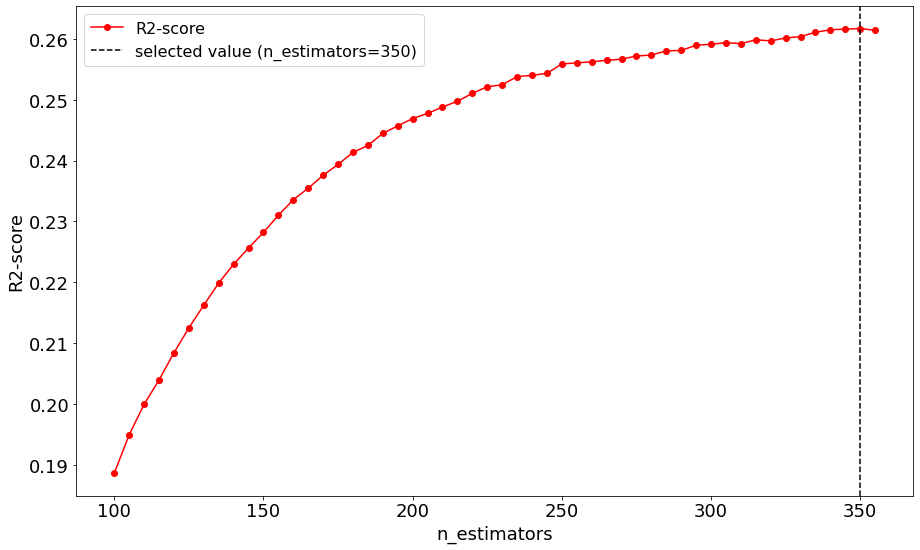

In [11]:
# r2-scores graph on the train set

# hyper-parameters selected by GridSearchCV
selected_model_params = selected_hyperparams
selected_model_params['random_state'] = RAND_SEED
selected_model_params['n_jobs'] = -1
selected_model_params['objective'] ='reg:squarederror'

showEvalutationGraph_regression(XGBRegressor, weather_daily_fs_train_df, cls='Rainfall (mm)', 
                                x_axis_param_name='n_estimators', x_axis_param_vals=n_estimators, 
                                selected_model_params=selected_model_params)

In [12]:
# test model
test_r2, test_mae, test_rmse = eval_regression(model, weather_daily_fs_test_df, cls='Rainfall (mm)')
# performance on the test set
print(f'Test set performance: r2-score={test_r2}, mae={test_mae}, rmse={test_rmse}')

Test set performance: r2-score=0.1626, mae=6.5777, rmse=15.8225


### 1.2 Apply SelectKBest Feature Selection to Daily Weather Dataset

In [17]:
# select features from the train dataset
weather_daily_fs2_train_df, cols_to_drop = seleckKBest_fs(weather_daily_train_df, 'Rainfall (mm)', is_regression=True)

print('features dropped:', cols_to_drop)

# keep only selected features on the test dataset
weather_daily_fs2_test_df = weather_daily_test_df.drop(columns=cols_to_drop)

features dropped: ['Max Temp. (degree Celcius)', 'Solar Radiation (cal/cm^2/day)']


In [18]:
# train model
model, selected_hyperparams, train_r2, train_mae, train_rmse = train_regression(initial_model, param_grid, weather_daily_fs2_train_df, cls='Rainfall (mm)')
print(f'Selected hyperparameters: {selected_hyperparams}')
# performance on the train set
print(f'Train set performance: r2-score={train_r2}, mae={train_mae}, rmse={train_rmse}')

Selected hyperparameters: {'learning_rate': 0.01, 'n_estimators': 340, 'subsample': 0.25, 'tree_method': 'hist'}
Train set performance: r2-score=0.2578, mae=6.1633, rmse=12.8717


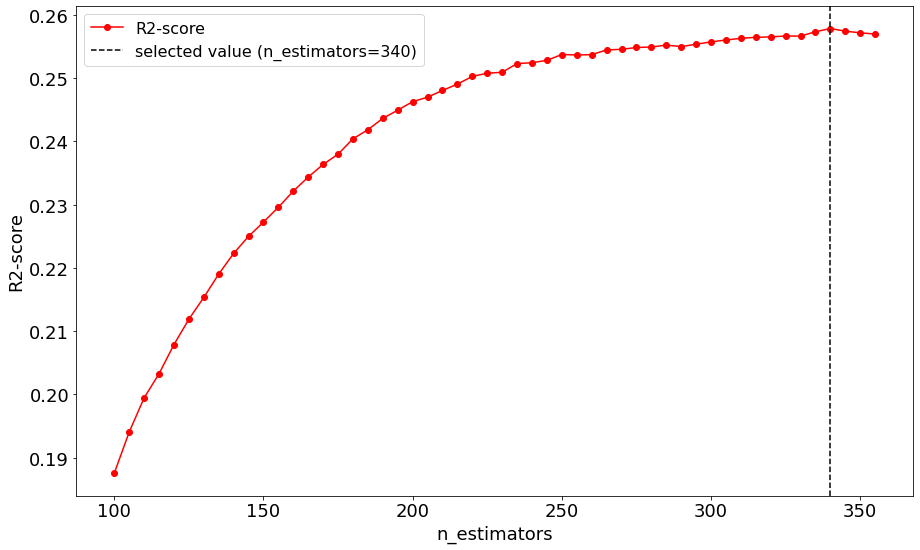

In [19]:
# r2-scores graph on the train set

# hyper-parameters selected by GridSearchCV
selected_model_params = selected_hyperparams
selected_model_params['random_state'] = RAND_SEED
selected_model_params['n_jobs'] = -1
selected_model_params['objective'] ='reg:squarederror'

showEvalutationGraph_regression(XGBRegressor, weather_daily_fs2_train_df, cls='Rainfall (mm)', 
                                x_axis_param_name='n_estimators', x_axis_param_vals=n_estimators, 
                                selected_model_params=selected_model_params)

In [20]:
# test model
test_r2, test_mae, test_rmse = eval_regression(model, weather_daily_fs2_test_df, cls='Rainfall (mm)')
# performance on the test set
print(f'Test set performance: r2-score={test_r2}, mae={test_mae}, rmse={test_rmse}')

Test set performance: r2-score=0.1563, mae=6.5575, rmse=15.8828
